# 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load dataset
df = pd.read_csv("iris_dataset.csv")
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [42]:
# 2) Define feature columns and target column
feature_cols = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
target_col = "target"
class_name = ["setosa", "versicolor", "virginica"]


# 3) Group by class
grouped = df.groupby(target_col)
print(grouped)

In [43]:
# 3.1) Mean table
mean_table = grouped[feature_cols].mean()
print("\nMean of features per class:")
print(mean_table)

# 3.2) Standard deviation table
std_table = grouped[feature_cols].std()
print("\nStandard deviation of features per class:")
print(std_table)

# 3.3) Range table: max - min
range_table = grouped[feature_cols].agg(lambda x: x.max() - x.min())
print("\nRange (max - min) of features per class:")
print(range_table)


Mean of features per class:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0                   5.006             3.428              1.462   
1                   5.936             2.770              4.260   
2                   6.588             2.974              5.552   

        petal width (cm)  
target                    
0                  0.246  
1                  1.326  
2                  2.026  

Standard deviation of features per class:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0                0.352490          0.379064           0.173664   
1                0.516171          0.313798           0.469911   
2                0.635880          0.322497           0.551895   

        petal width (cm)  
target                    
0               0.105386  
1               0.197753  
2               0.27465

In [44]:
# 4) Correlation matrix for each class
classes = df[target_col].unique()

corr_matrices = {}

for cls in classes:
    cls_data = df[df[target_col] == cls][feature_cols]
    print(cls_data)
    corr = cls_data.corr() 
    corr_matrices[cls] = corr
    print(f"\nCorrelation matrix for class: {cls}")
    print(corr)


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
10                5.4               3.7                1.5               0.2
11                4.8               3.4                1.6               0.2

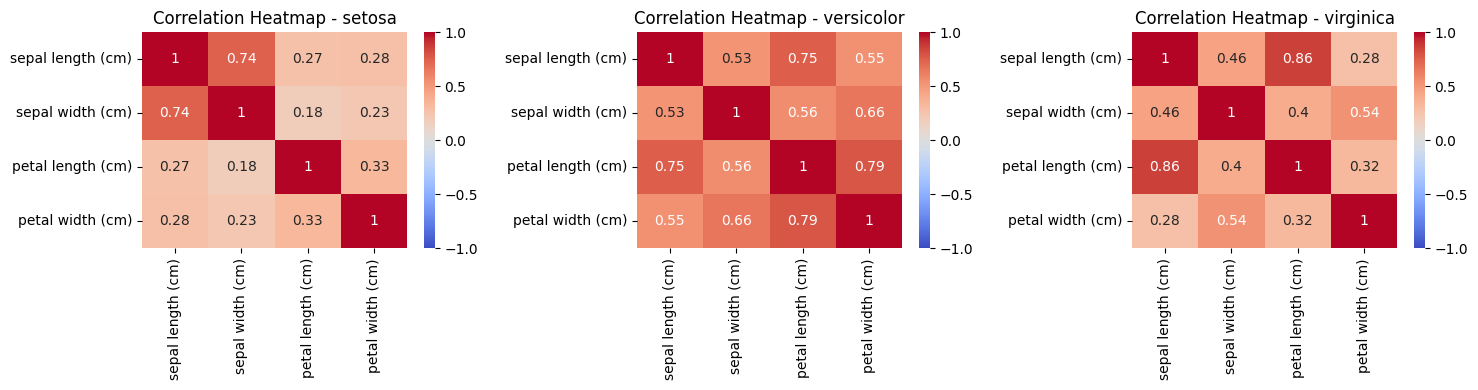

In [45]:
# 5) Plot heatmaps for each class
plt.figure(figsize=(15, 4))

for i, cls in enumerate(classes, start=1):
    plt.subplot(1, len(classes), i)
    sns.heatmap(
        corr_matrices[cls], 
        annot=True, 
        vmin=-1, vmax=1, 
        cmap="coolwarm"
    )
    plt.title(f"Correlation Heatmap - {class_name[i-1]}")

plt.tight_layout()
plt.show()


In [48]:
# ==========================
# 6) Find most correlated pairs in each class
# ==========================

def get_top_corr_pairs(corr_matrix, n=3):
    """
    Return top n pairs (i,j) with highest absolute correlation
    """
    corr = corr_matrix.copy()
    np.fill_diagonal(corr.values, 0)

    # Convert to long format and sort by absolute value
    corr_stacked = corr.abs().stack().sort_values(ascending=False)

    unique_pairs = []
    seen = set()

    for (f1, f2), val in corr_stacked.items():
        pair = tuple(sorted([f1, f2]))
        if pair not in seen:
            seen.add(pair)
            unique_pairs.append((pair[0], pair[1], val))
        if len(unique_pairs) >= n:
            break

    return unique_pairs


print("\nTop correlated feature pairs per class:")

for i, cls in enumerate(classes):

    print(f"\nTop correlated feature pairs in {label}:")
    top_pairs = get_top_corr_pairs(corr_matrices[cls], n=3)

    for f1, f2, val in top_pairs:
        print(f"{f1} - {f2}: correlation = {val:.2f}")


Top correlated feature pairs per class:

Top correlated feature pairs in class 2 - virginica:
sepal length (cm) - sepal width (cm): correlation = 0.74
petal length (cm) - petal width (cm): correlation = 0.33
petal width (cm) - sepal length (cm): correlation = 0.28

Top correlated feature pairs in class 2 - virginica:
petal length (cm) - petal width (cm): correlation = 0.79
petal length (cm) - sepal length (cm): correlation = 0.75
petal width (cm) - sepal width (cm): correlation = 0.66

Top correlated feature pairs in class 2 - virginica:
petal length (cm) - sepal length (cm): correlation = 0.86
petal width (cm) - sepal width (cm): correlation = 0.54
sepal length (cm) - sepal width (cm): correlation = 0.46


# 5

In [72]:
import pandas as pd
import numpy as np

# 1) Load dataset
df = pd.read_csv("iris_dataset.csv")

# We know the exact column names from sklearn's iris CSV
col_len = "sepal length (cm)"
col_wid = "sepal width (cm)"
label_col = "target"

In [73]:
# 2) Select only Sepal Length and Sepal Width
X = df[[col_len, col_wid]].values  
y = df[label_col].values 

In [78]:
# 3) Separate test point (last sample) and training set
X_test = X[-1]        
y_true = y[-1]       

X_train = X[:-1]     
y_train = y[:-1]    

print("Test point (P_test):", X_test)
print("True class of P_test:", y_true)

Test point (P_test): [5.9 3. ]
True class of P_test: 2


In [79]:
# Euclidean distance between two 2D points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# 4) k = 1
distances = np.array([euclidean_distance(X_test, x) for x in X_train])

# index of the smallest distance
nearest_index = np.argmin(distances)
nearest_distance = distances[nearest_index]
nearest_class = y_train[nearest_index]

print("\n=== k = 1 (Nearest Neighbor) ===")
print("Nearest distance:", nearest_distance)
print("Nearest neighbor features:", X_train[nearest_index])
print("Nearest neighbor class:", nearest_class)
print("Predicted class for P_test (k=1):", nearest_class)
print("Prediction correct?", nearest_class == y_true)


=== k = 1 (Nearest Neighbor) ===
Nearest distance: 0.0
Nearest neighbor features: [5.9 3. ]
Nearest neighbor class: 1
Predicted class for P_test (k=1): 1
Prediction correct? False


In [80]:
# 5) k = 3 (3 nearest neighbors and majority vote)
k = 3
# indices of sorted distances (ascending)
sorted_indices = np.argsort(distances)

k_indices = sorted_indices[:k]    # first k indices
k_neighbors_classes = y_train[k_indices]

print("\n=== k = 3 (Three Nearest Neighbors) ===")
print("Indices of 3 nearest neighbors:", k_indices)
print("Classes of 3 nearest neighbors:", k_neighbors_classes)

# majority vote: most frequent class among the 3
values, counts = np.unique(k_neighbors_classes, return_counts=True)
majority_class = values[np.argmax(counts)]

print("Predicted class for P_test (k=3):", majority_class)
print("Prediction correct?", majority_class == y_true)


=== k = 3 (Three Nearest Neighbors) ===
Indices of 3 nearest neighbors: [ 61 138  78]
Classes of 3 nearest neighbors: [1 2 1]
Predicted class for P_test (k=3): 1
Prediction correct? False


# 6

In [82]:
# Z-score normalization 
mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0)

X_train_norm = (X_train - mu) / sigma
X_test_norm = (X_test - mu) / sigma

# Compute distances after normalization
dists_norm = np.array([euclidean_distance(X_test_norm, x) for x in X_train_norm])

# k=3 nearest neighbors
sorted_idx_norm = np.argsort(dists_norm)
k_idx_norm = sorted_idx_norm[:k]
k_classes_norm = y_train[k_idx_norm]

# Majority vote
vals2, counts2 = np.unique(k_classes_norm, return_counts=True)
pred_norm = vals2[np.argmax(counts2)]

print("\n=== WITH Z-SCORE NORMALIZATION ===")
print("True class:", y_true)
print("3 nearest classes:", k_classes_norm)
print("Predicted:", pred_norm)
print("Correct?", pred_norm == y_true)



=== WITH Z-SCORE NORMALIZATION ===
True class: 2
3 nearest classes: [1 2 2]
Predicted: 2
Correct? True


# 7

In [93]:
import pandas as pd
import numpy as np
from math import sqrt, pi, exp

# ------------------------------
# Gaussian probability function
# ------------------------------
def gaussian_prob(x, mu, var):
    sigma = sqrt(var)
    return (1 / (sqrt(2 * pi) * sigma)) * exp(-0.5 * ((x - mu) / sigma) ** 2)

# ------------------------------
# Load datasets
# ------------------------------
train = pd.read_csv("iris_dataset.csv")
test = pd.read_csv("iris_test_samples.csv")

# ------------------------------
# Extract features / classes
# ------------------------------
y_train = train["target"]
classes = y_train.unique()

# ------------------------------
# Compute stats for each class
# ------------------------------
stats = {}

class_name_map = {
    0: "setosa",
    1: "versicolor",
    2: "virginica"
}

for c in classes:
    subset = train[train["target"] == c]

    stats[c] = {
        "mean": subset.mean(numeric_only=True),
        "var": subset.var(numeric_only=True),
        "min": subset.min(numeric_only=True),
        "max": subset.max(numeric_only=True),
        "range": subset.max(numeric_only=True) - subset.min(numeric_only=True)
    }
    
    # ------- print stats for this class -------
    class_name = class_name_map.get(c, f"class {c}")
    print(f"\n================== Class {c} ({class_name})==================")
    print("\n--- Mean:\n", stats[c]["mean"])
    print("\n--- Variance:\n", stats[c]["var"])
    print("\n--- Min:\n", stats[c]["min"])
    print("\n--- Max:\n", stats[c]["max"])
    print("\n--- Range:\n", stats[c]["range"])

# ------------------------------
# STEP 4: Classification using petal length only
# ------------------------------
def predict_single_feature(x, feature_name):
    probs = {}
    for c in classes:
        mu = stats[c]["mean"][feature_name]
        var = stats[c]["var"][feature_name]
        probs[c] = gaussian_prob(x, mu, var)
    return max(probs, key=probs.get)

train_pred_1f = train["petal length (cm)"].apply(
    lambda x: predict_single_feature(x, "petal length (cm)")
)

# ------------------------------
# STEP 5: Training accuracy (one feature)
# ------------------------------
train_acc_1f = (train_pred_1f == train["target"]).mean() * 100

# ------------------------------
# STEP 6-7: Test accuracy (one feature)
# ------------------------------
test_pred_1f = test["petal length (cm)"].apply(
    lambda x: predict_single_feature(x, "petal length (cm)")
)
test_acc_1f = (test_pred_1f == test["target"]).mean() * 100

# ------------------------------
# STEP 8: Two features (petal length + width)
# ------------------------------
def predict_two_features(x1, x2):
    probs = {}
    for c in classes:
        mu1 = stats[c]["mean"]["petal length (cm)"]
        mu2 = stats[c]["mean"]["petal width (cm)"]

        v1 = stats[c]["var"]["petal length (cm)"]
        v2 = stats[c]["var"]["petal width (cm)"]

        p1 = gaussian_prob(x1, mu1, v1)
        p2 = gaussian_prob(x2, mu2, v2)

        probs[c] = (p1 + p2) / 2.0
    return max(probs, key=probs.get)

test_pred_2f = [
    predict_two_features(row["petal length (cm)"], row["petal width (cm)"])
    for _, row in test.iterrows()
]

test_acc_2f = np.mean(np.array(test_pred_2f) == test["target"].values) * 100

# ------------------------------
# STEP 10: Use all 4 features, pick top-2 probabilities
# ------------------------------
all_features = [
    "sepal length (cm)",
    "sepal width (cm)",
    "petal length (cm)",
    "petal width (cm)"
]

def predict_top2(row):
    probs = {}
    for c in classes:
        p_list = []
        for feature in all_features:
            mu = stats[c]["mean"][feature]
            var = stats[c]["var"][feature]
            p_list.append(gaussian_prob(row[feature], mu, var))

        # pick top 2 probabilities
        top2 = sorted(p_list, reverse=True)[:2]
        probs[c] = np.mean(top2)

    return max(probs, key=probs.get)

test_pred_top2 = test.apply(predict_top2, axis=1)
test_acc_top2 = (test_pred_top2 == test["target"]).mean() * 100

# ------------------------------
# Print results
# ------------------------------
print("\n================== ACCURACY RESULTS ==================")
print("Training accuracy (1 feature - petal length):", train_acc_1f)
print("Test accuracy (1 feature - petal length):    ", test_acc_1f)
print("Test accuracy (2 features - petal len+wid):  ", test_acc_2f)
print("Test accuracy (Top-2 from 4 features):       ", test_acc_top2)



================== Class 0 (setosa)==================

--- Mean:
 sepal length (cm)    5.006
sepal width (cm)     3.428
petal length (cm)    1.462
petal width (cm)     0.246
target               0.000
dtype: float64

--- Variance:
 sepal length (cm)    0.124249
sepal width (cm)     0.143690
petal length (cm)    0.030159
petal width (cm)     0.011106
target               0.000000
dtype: float64

--- Min:
 sepal length (cm)    4.3
sepal width (cm)     2.3
petal length (cm)    1.0
petal width (cm)     0.1
target               0.0
dtype: float64

--- Max:
 sepal length (cm)    5.8
sepal width (cm)     4.4
petal length (cm)    1.9
petal width (cm)     0.6
target               0.0
dtype: float64

--- Range:
 sepal length (cm)    1.5
sepal width (cm)     2.1
petal length (cm)    0.9
petal width (cm)     0.5
target               0.0
dtype: float64

================== Class 1 (versicolor)==================

--- Mean:
 sepal length (cm)    5.936
sepal width (cm)     2.770
petal length (cm)    4